# Robust Automated Transformer-based Cardiac Health Evaluation Tool -> RATCHET

In [1]:
import read_data as rd
import reprocessing as re_prcs
import numpy as np
import matplotlib.pyplot as plt
og_signals = rd.read_record("/home/phuc/university_of_science/ECG_Transformer/ECG-TRANSFORMER/data/mit-bih-arrhythmia-database-1.0.0/100")
annotation = rd.read_annotate("/home/phuc/university_of_science/ECG_Transformer/ECG-TRANSFORMER/data/mit-bih-arrhythmia-database-1.0.0/100")
#print(signals, annotation)

/home/phuc/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### We will now seperate normal heart beat from abnormal ones

In [2]:

annote_all_beats = re_prcs.beat_annotations(annotation)
annote_normal_beats = re_prcs.normal_beat_annotations(annotation)
print(annote_all_beats)
print(annote_normal_beats)

(array([    77,    370,    662, ..., 649484, 649734, 649991]), array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype='<U1'))
(array([    77,    370,    662, ..., 649484, 649734, 649991]), array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype='<U1'))


In [3]:
normal_beats_idx = annote_normal_beats[0]
all_beats_idx = annote_all_beats[0]

# Find abnormal beat indices by taking the set difference
abnormal_beat_idx = list(set(all_beats_idx) - set(normal_beats_idx))

print(abnormal_beat_idx)


[99579, 520982, 397335, 279576, 562812, 444705, 307745, 422818, 593068, 305709, 433841, 629171, 346804, 436149, 458168, 351481, 496712, 567379, 128085, 317785, 574429, 170719, 377081, 66792, 546792, 74986, 421994, 566259, 319223, 579448, 312825, 454651, 2044, 442623]


In [4]:
signals = np.array(og_signals).flatten() #flattening original signal to one-dimensional array
print(signals)

[-0.145 -0.145 -0.145 ... -0.675 -0.765 -1.28 ]


[-0.16756799 -0.16756758 -0.16756634 ... -0.52743165 -0.59770604
 -1.        ]
0.94
-0.97


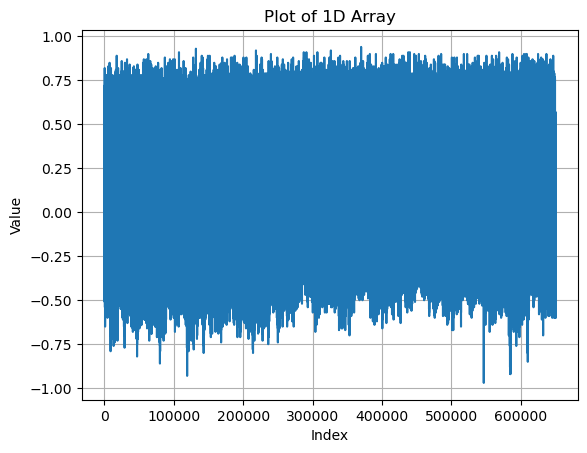

In [5]:
#normalizing signal
norm_signals = re_prcs.norm(signals, window_len=500 )

print(norm_signals)
norm_signals = re_prcs.smooth(norm_signals,11)
norm_signals = [round(num, 2) for num in norm_signals]
print(max(norm_signals))
print(min(norm_signals))
x_values = np.arange(len(norm_signals))

# Plot the array
plt.plot(x_values, norm_signals)
plt.title('Plot of 1D Array')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [6]:
#splitting the data into chunks/tokens
split_idx = rd.spliting_index(chunk_size=2500,chunk_step=1,max_index=len(norm_signals), num_overlap=10,start_idx=0)
print(split_idx)

[[     0      1      2 ...   2497   2498   2499]
 [  2490   2491   2492 ...   4987   4988   4989]
 [  4980   4981   4982 ...   7477   7478   7479]
 ...
 [642420 642421 642422 ... 644917 644918 644919]
 [644910 644911 644912 ... 647407 647408 647409]
 [647400 647401 647402 ... 649897 649898 649899]]


In [7]:
#maximum bumber of token
possible_val = sorted(list(set(norm_signals)))
print(len(possible_val))

191
